<h3>Import Modules</h3>

In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
import tensorflow as tf

<h3>1. Types to execute a Session</h3>

<h5>Build the graph</h5>

In [4]:
node1 = tf.constant(3.0, tf.float32)
node2 = tf.constant(4.0)

<h5>1.1 Type 1</h5>

In [5]:
# sess type 1
sess = tf.Session()
print(sess.run([node1,node2]))
sess.close()

[3.0, 4.0]


<h5>1.2 Type 2</h5>

In [6]:
# sess type 2
with tf.Session() as sess:
    output = sess.run([node1,node2])
    print(output)

[3.0, 4.0]


<h3>2. Example of calculation </h3>

In [7]:
a = tf.constant(5.0)
b = tf.constant(1.5)

c = a*b

sess = tf.Session()
print(sess.run(c))
sess.close()

7.5


<h3> 3. TensorBoard</h3>

In [8]:
File_Writer = tf.summary.FileWriter("tf_graph/",sess.graph)

Execute <b>tensorboard --logdir="."</b> in terminal

<h3>4. Constants</h3>
<p>Constant tensors <b><i>take no input</i></b> from outside, but output whatever they have internally.</p>
<p>So we cannot change or assign them different values.</p>

In [9]:
a = tf.constant(5.0)
b = tf.constant(1.5)

sess = tf.Session()
print(sess.run([a,b]))
sess.close()

[5.0, 1.5]


<h3>5. Placeholders</h3>
<p>A placeholder is a promise to <b>provide the imput later</b>.</p>
<p>This is the case when we want the graph to accept external input.s</p>

In [10]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

add = a+b

sess = tf.Session()
print(sess.run(add,{a:[1,2],b:[10,20]}))
sess.close()

[11. 22.]


<h3> 6. Variables</h3>
<p>Variables are those which <b>allow us to modify or update</b> their values.</p>
<p>Thus in ML, weights and biases are often of type Variable, as they get updated for beter accuracies.</p>

In [31]:
W = tf.Variable([.3],tf.float32)
b = tf.Variable([-.3],tf.float32)
x = tf.placeholder(tf.float32)

init = tf.global_variables_initializer()

linear_model = W*x + b
sess = tf.Session()
sess.run(init) #run it only after launching the model
print(sess.run(linear_model,{x:[1,2,3,4]}))

[0.         0.3        0.6        0.90000004]


<h3>7. Simple Linear Model</h3>

<p>We don't know how good this model is, till we know the error.</p>
<p><b>Error / Loss</b> is the one which tells how far our model output is, from the actual label or desired outptut</p>
<p> So we will need to calculate the error, update the parameters, check the output, and continue this process till output is optimal</p>

In [39]:
# Model parameters
W = tf.Variable([.3],tf.float32)
b = tf.Variable([-.3],tf.float32)

# Input
x = tf.placeholder(tf.float32)

# Output
y = tf.placeholder(tf.float32)

# function
linear_model = W*x + b

# Loss
squared_delta = tf.square(y - linear_model)
loss = tf.reduce_sum(squared_delta)

init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init) #run it only after launching the model
sess.run(loss,{x:[1,2,3,4], y:[0,-1,-2,-3]})

23.66

<p> By updating the parameter values, the loss is effected as shown below.</p>

In [38]:
# Model parameters
W = tf.Variable([-1.],tf.float32)
b = tf.Variable([1.],tf.float32)

# Input
x = tf.placeholder(tf.float32)

# Output
y = tf.placeholder(tf.float32)

# function
linear_model = W*x + b

# Loss
squared_delta = tf.square(y - linear_model)
loss = tf.reduce_sum(squared_delta)

init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init) #run it only after launching the model
sess.run(loss,{x:[1,2,3,4], y:[0,-1,-2,-3]})



0.0

<p>To make the machine learn the optimal parameters that could lead the model to give out the output such that the loss is minimum, we need <b>optimizers</b>.</p>
<ul>
<li>An <b>optimizer</b> will check the change in the loss with respect to the change in the variable.</li>

<li>If the loss is decreasing, then it will keep on changing the variable in that particular direction.</li>
</ul>
<p> Let us use the famous <b>gradient descent</b> optimizer here.</p>

In [44]:
# Model parameters
W = tf.Variable([.3],tf.float32)
b = tf.Variable([-.3],tf.float32)

# Input
x = tf.placeholder(tf.float32)

# Output
y = tf.placeholder(tf.float32)

# function
linear_model = W*x + b

# Loss
squared_delta = tf.square(y - linear_model)
loss = tf.reduce_sum(squared_delta)

# Optimize
optimizer = tf.train.GradientDescentOptimizer(0.01) # learning rate is the parameter
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init) #run it only after launching the model
for i in range(1000):
    sess.run(train,{x:[1,2,3,4], y:[0,-1,-2,-3]})
# print(sess.run([W,b]))

a,b = sess.run([W,b])
print("W: "+str(a)+" b:"+str(b))

W: [-0.9999969] b:[0.9999908]


<h3>8. Implementation of Simple Usecase - Level Mine Identifier</h3>

<p>This is the workflow very commonly followed while solving machine learning problems</p><br>
<img src="tf-code-steps.png" alt="WorkFlow" height="100" width="780">

<h5>8.1 Importing necesary libraries</h5>

In [107]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

<h5>8.2 Read the data into Pandas dataframe</h5>

In [108]:
def read_dataset():
    df = pd.read_csv("sonar-data-set.csv")
    # X and y are np arrays
    X = df[df.columns[0:60]].values
    y = df[df.columns[60]]
    
    # Encode the dependent variable
    encoder = LabelEncoder()
    encoder.fit(y)
    #encoder.classes_
    y = encoder.transform(y)
    Y = one_hot_encode(y)
    return X,Y

<h5>8.2 One hot encoding of labels vector</h5>

In [109]:
def one_hot_encode(y):
    n_labels = len(y)
    n_unique_labels = len(np.unique(y))
    one_hot_encode = np.zeros((n_labels,n_unique_labels))
    one_hot_encode[np.arange(n_labels),y] = 1
    return one_hot_encode

<h5>8.3 Defining the Model</h5>

In [110]:
def multilayer_perceptron(x, weights, biases):
    
    # Hidden layer with sigmoid activated
    layer_1 = tf.add(tf.matmul(x,weights['h1']), biases['b1'])
    layer_1 = tf.nn.sigmoid(layer_1)
    
    # Hidden layer with sigmoid activated
    layer_2 = tf.add(tf.matmul(layer_1,weights['h2']), biases['b2'])
    layer_2 = tf.nn.sigmoid(layer_2)
    
    # Hidden layer with sigmoid activated
    layer_3 = tf.add(tf.matmul(layer_2,weights['h3']), biases['b3'])
    layer_3 = tf.nn.sigmoid(layer_3)
    
    # Hidden layer with RELU activated
    layer_4 = tf.add(tf.matmul(layer_3,weights['h4']), biases['b4'])
    layer_4 = tf.nn.relu(layer_4)
    
    # Output layer with linear activation
    out_layer = tf.matmul(layer_4, weights['out']+biases['out'])
    return out_layer

<h5>8.3 The Main Function</h5>

('n_dim', 60)
**
(165, 60)
(165, 2)
(42, 60)
(42, 2)
('epoch: ', 0, ' - ', 'cost:', 41.498108, ' -MSE:', 15631.175305148327, ' -Train Accuracy: ', 0.54545456)
('epoch: ', 1, ' - ', 'cost:', 28.86277, ' -MSE:', 11835.684032534835, ' -Train Accuracy: ', 0.45454547)
('epoch: ', 2, ' - ', 'cost:', 39.9134, ' -MSE:', 13192.204837805273, ' -Train Accuracy: ', 0.54545456)
('epoch: ', 3, ' - ', 'cost:', 16.68281, ' -MSE:', 9349.177525961453, ' -Train Accuracy: ', 0.45454547)
('epoch: ', 4, ' - ', 'cost:', 37.867496, ' -MSE:', 11159.919931192413, ' -Train Accuracy: ', 0.54545456)
('epoch: ', 5, ' - ', 'cost:', 7.9099336, ' -MSE:', 7829.826704276884, ' -Train Accuracy: ', 0.45454547)
('epoch: ', 6, ' - ', 'cost:', 37.012604, ' -MSE:', 9808.489638148603, ' -Train Accuracy: ', 0.54545456)
('epoch: ', 7, ' - ', 'cost:', 1.3305181, ' -MSE:', 6858.577448146143, ' -Train Accuracy: ', 0.45454547)
('epoch: ', 8, ' - ', 'cost:', 23.682928, ' -MSE:', 7779.57347035298, ' -Train Accuracy: ', 0.54545456)
('e

('epoch: ', 77, ' - ', 'cost:', 2.999948, ' -MSE:', 1059.5141728327924, ' -Train Accuracy: ', 0.54545456)
('epoch: ', 78, ' - ', 'cost:', 1.7957048, ' -MSE:', 946.9076466432227, ' -Train Accuracy: ', 0.5212121)
('epoch: ', 79, ' - ', 'cost:', 2.821631, ' -MSE:', 1024.1967858050416, ' -Train Accuracy: ', 0.54545456)
('epoch: ', 80, ' - ', 'cost:', 1.7895058, ' -MSE:', 915.639344058329, ' -Train Accuracy: ', 0.5212121)
('epoch: ', 81, ' - ', 'cost:', 2.6697419, ' -MSE:', 989.9987888276903, ' -Train Accuracy: ', 0.54545456)
('epoch: ', 82, ' - ', 'cost:', 1.749853, ' -MSE:', 886.7512892826483, ' -Train Accuracy: ', 0.5212121)
('epoch: ', 83, ' - ', 'cost:', 2.5003314, ' -MSE:', 957.751145562433, ' -Train Accuracy: ', 0.54545456)
('epoch: ', 84, ' - ', 'cost:', 1.7303625, ' -MSE:', 859.4240038352963, ' -Train Accuracy: ', 0.5212121)
('epoch: ', 85, ' - ', 'cost:', 2.356471, ' -MSE:', 927.436464600866, ' -Train Accuracy: ', 0.54545456)
('epoch: ', 86, ' - ', 'cost:', 1.69843, ' -MSE:', 833.

('epoch: ', 155, ' - ', 'cost:', 0.5720011, ' -MSE:', 528.5742920096819, ' -Train Accuracy: ', 0.76363635)
('epoch: ', 156, ' - ', 'cost:', 0.5611979, ' -MSE:', 511.3735534101392, ' -Train Accuracy: ', 0.7151515)
('epoch: ', 157, ' - ', 'cost:', 0.556923, ' -MSE:', 526.0740701599158, ' -Train Accuracy: ', 0.76363635)
('epoch: ', 158, ' - ', 'cost:', 0.5464592, ' -MSE:', 509.92201632771514, ' -Train Accuracy: ', 0.7151515)
('epoch: ', 159, ' - ', 'cost:', 0.5423523, ' -MSE:', 523.8211258140639, ' -Train Accuracy: ', 0.77575755)
('epoch: ', 160, ' - ', 'cost:', 0.533216, ' -MSE:', 508.6894016701846, ' -Train Accuracy: ', 0.7151515)
('epoch: ', 161, ' - ', 'cost:', 0.5297783, ' -MSE:', 521.9602141370789, ' -Train Accuracy: ', 0.7818182)
('epoch: ', 162, ' - ', 'cost:', 0.52296066, ' -MSE:', 507.20474215818336, ' -Train Accuracy: ', 0.72727275)
('epoch: ', 163, ' - ', 'cost:', 0.5189181, ' -MSE:', 520.0359656121313, ' -Train Accuracy: ', 0.7878788)
('epoch: ', 164, ' - ', 'cost:', 0.511614

('epoch: ', 233, ' - ', 'cost:', 0.41760027, ' -MSE:', 507.5343444875963, ' -Train Accuracy: ', 0.8121212)
('epoch: ', 234, ' - ', 'cost:', 0.4142197, ' -MSE:', 498.0558249491789, ' -Train Accuracy: ', 0.7818182)
('epoch: ', 235, ' - ', 'cost:', 0.41698068, ' -MSE:', 507.2317096660339, ' -Train Accuracy: ', 0.8121212)
('epoch: ', 236, ' - ', 'cost:', 0.41365746, ' -MSE:', 497.67755306356577, ' -Train Accuracy: ', 0.7818182)
('epoch: ', 237, ' - ', 'cost:', 0.41696656, ' -MSE:', 507.187901234411, ' -Train Accuracy: ', 0.8121212)
('epoch: ', 238, ' - ', 'cost:', 0.41354722, ' -MSE:', 497.48850338114823, ' -Train Accuracy: ', 0.7818182)
('epoch: ', 239, ' - ', 'cost:', 0.41637796, ' -MSE:', 506.8025758789005, ' -Train Accuracy: ', 0.8121212)
('epoch: ', 240, ' - ', 'cost:', 0.41279227, ' -MSE:', 497.08167841511255, ' -Train Accuracy: ', 0.7818182)
('epoch: ', 241, ' - ', 'cost:', 0.41570482, ' -MSE:', 506.7082344563264, ' -Train Accuracy: ', 0.8121212)
('epoch: ', 242, ' - ', 'cost:', 0.4

('epoch: ', 311, ' - ', 'cost:', 0.36218187, ' -MSE:', 496.9890950369415, ' -Train Accuracy: ', 0.8545455)
('epoch: ', 312, ' - ', 'cost:', 0.35989317, ' -MSE:', 490.04612973087916, ' -Train Accuracy: ', 0.830303)
('epoch: ', 313, ' - ', 'cost:', 0.36148745, ' -MSE:', 496.9644491148149, ' -Train Accuracy: ', 0.8545455)
('epoch: ', 314, ' - ', 'cost:', 0.35892525, ' -MSE:', 490.1055043486026, ' -Train Accuracy: ', 0.830303)
('epoch: ', 315, ' - ', 'cost:', 0.36034125, ' -MSE:', 496.8450682097567, ' -Train Accuracy: ', 0.8545455)
('epoch: ', 316, ' - ', 'cost:', 0.35795504, ' -MSE:', 490.0199004529381, ' -Train Accuracy: ', 0.830303)
('epoch: ', 317, ' - ', 'cost:', 0.35999063, ' -MSE:', 496.94109314655, ' -Train Accuracy: ', 0.8545455)
('epoch: ', 318, ' - ', 'cost:', 0.356879, ' -MSE:', 490.06163466321146, ' -Train Accuracy: ', 0.830303)
('epoch: ', 319, ' - ', 'cost:', 0.35767564, ' -MSE:', 496.6050809884381, ' -Train Accuracy: ', 0.8545455)
('epoch: ', 320, ' - ', 'cost:', 0.3548934,

('epoch: ', 388, ' - ', 'cost:', 0.3153486, ' -MSE:', 496.06469965248357, ' -Train Accuracy: ', 0.8363636)
('epoch: ', 389, ' - ', 'cost:', 0.31551293, ' -MSE:', 500.2727703468966, ' -Train Accuracy: ', 0.8666667)
('epoch: ', 390, ' - ', 'cost:', 0.3146613, ' -MSE:', 496.22404885436185, ' -Train Accuracy: ', 0.8363636)
('epoch: ', 391, ' - ', 'cost:', 0.31493136, ' -MSE:', 500.4616819414616, ' -Train Accuracy: ', 0.8666667)
('epoch: ', 392, ' - ', 'cost:', 0.31421214, ' -MSE:', 496.45670734748734, ' -Train Accuracy: ', 0.8363636)
('epoch: ', 393, ' - ', 'cost:', 0.31480017, ' -MSE:', 500.8162019708233, ' -Train Accuracy: ', 0.8666667)
('epoch: ', 394, ' - ', 'cost:', 0.3140047, ' -MSE:', 496.63836068409313, ' -Train Accuracy: ', 0.8484849)
('epoch: ', 395, ' - ', 'cost:', 0.3143602, ' -MSE:', 501.0574717223436, ' -Train Accuracy: ', 0.8666667)
('epoch: ', 396, ' - ', 'cost:', 0.3135001, ' -MSE:', 496.8742395757503, ' -Train Accuracy: ', 0.8484849)
('epoch: ', 397, ' - ', 'cost:', 0.314

('epoch: ', 465, ' - ', 'cost:', 0.29077783, ' -MSE:', 502.8786174673263, ' -Train Accuracy: ', 0.8727273)
('epoch: ', 466, ' - ', 'cost:', 0.29030946, ' -MSE:', 499.44974560583444, ' -Train Accuracy: ', 0.8606061)
('epoch: ', 467, ' - ', 'cost:', 0.2901738, ' -MSE:', 502.8832036692374, ' -Train Accuracy: ', 0.8727273)
('epoch: ', 468, ' - ', 'cost:', 0.2896243, ' -MSE:', 499.44988692916445, ' -Train Accuracy: ', 0.8606061)
('epoch: ', 469, ' - ', 'cost:', 0.28921187, ' -MSE:', 502.82733449930885, ' -Train Accuracy: ', 0.8727273)
('epoch: ', 470, ' - ', 'cost:', 0.288682, ' -MSE:', 499.579808083684, ' -Train Accuracy: ', 0.8606061)
('epoch: ', 471, ' - ', 'cost:', 0.28833458, ' -MSE:', 502.77940072045385, ' -Train Accuracy: ', 0.8727273)
('epoch: ', 472, ' - ', 'cost:', 0.2877948, ' -MSE:', 499.575287560914, ' -Train Accuracy: ', 0.8606061)
('epoch: ', 473, ' - ', 'cost:', 0.28726736, ' -MSE:', 502.77019719385794, ' -Train Accuracy: ', 0.8787879)
('epoch: ', 474, ' - ', 'cost:', 0.2868

('epoch: ', 542, ' - ', 'cost:', 0.2625332, ' -MSE:', 504.41194934679015, ' -Train Accuracy: ', 0.8848485)
('epoch: ', 543, ' - ', 'cost:', 0.26226935, ' -MSE:', 505.25282559715095, ' -Train Accuracy: ', 0.8848485)
('epoch: ', 544, ' - ', 'cost:', 0.26202404, ' -MSE:', 504.41523284204584, ' -Train Accuracy: ', 0.8848485)
('epoch: ', 545, ' - ', 'cost:', 0.26172507, ' -MSE:', 505.5397036871306, ' -Train Accuracy: ', 0.8909091)
('epoch: ', 546, ' - ', 'cost:', 0.26144797, ' -MSE:', 504.7350556642265, ' -Train Accuracy: ', 0.8848485)
('epoch: ', 547, ' - ', 'cost:', 0.26125547, ' -MSE:', 505.7049740326239, ' -Train Accuracy: ', 0.8909091)
('epoch: ', 548, ' - ', 'cost:', 0.26095152, ' -MSE:', 504.7228489055727, ' -Train Accuracy: ', 0.8848485)
('epoch: ', 549, ' - ', 'cost:', 0.26068828, ' -MSE:', 505.79896417826853, ' -Train Accuracy: ', 0.8909091)
('epoch: ', 550, ' - ', 'cost:', 0.2604283, ' -MSE:', 504.9902203240374, ' -Train Accuracy: ', 0.8848485)
('epoch: ', 551, ' - ', 'cost:', 0.

('epoch: ', 619, ' - ', 'cost:', 0.2450386, ' -MSE:', 514.4936032939121, ' -Train Accuracy: ', 0.8909091)
('epoch: ', 620, ' - ', 'cost:', 0.24478725, ' -MSE:', 512.9672779863413, ' -Train Accuracy: ', 0.8909091)
('epoch: ', 621, ' - ', 'cost:', 0.24456792, ' -MSE:', 514.7601852864095, ' -Train Accuracy: ', 0.8909091)
('epoch: ', 622, ' - ', 'cost:', 0.24439466, ' -MSE:', 513.2260787622147, ' -Train Accuracy: ', 0.8909091)
('epoch: ', 623, ' - ', 'cost:', 0.24418195, ' -MSE:', 515.1503002800216, ' -Train Accuracy: ', 0.8909091)
('epoch: ', 624, ' - ', 'cost:', 0.24391249, ' -MSE:', 513.6010135838313, ' -Train Accuracy: ', 0.8909091)
('epoch: ', 625, ' - ', 'cost:', 0.2435701, ' -MSE:', 515.4482395538246, ' -Train Accuracy: ', 0.8909091)
('epoch: ', 626, ' - ', 'cost:', 0.2432534, ' -MSE:', 513.9643991412155, ' -Train Accuracy: ', 0.8969697)
('epoch: ', 627, ' - ', 'cost:', 0.24311586, ' -MSE:', 515.7100584411722, ' -Train Accuracy: ', 0.8909091)
('epoch: ', 628, ' - ', 'cost:', 0.24307

('epoch: ', 696, ' - ', 'cost:', 0.23205316, ' -MSE:', 522.1342333704666, ' -Train Accuracy: ', 0.90909094)
('epoch: ', 697, ' - ', 'cost:', 0.23188426, ' -MSE:', 524.9783407728321, ' -Train Accuracy: ', 0.8909091)
('epoch: ', 698, ' - ', 'cost:', 0.23192851, ' -MSE:', 522.3526963378192, ' -Train Accuracy: ', 0.90909094)
('epoch: ', 699, ' - ', 'cost:', 0.23151179, ' -MSE:', 525.3241046163433, ' -Train Accuracy: ', 0.8909091)
('epoch: ', 700, ' - ', 'cost:', 0.23116903, ' -MSE:', 522.5989068885983, ' -Train Accuracy: ', 0.90909094)
('epoch: ', 701, ' - ', 'cost:', 0.23088074, ' -MSE:', 525.407011572402, ' -Train Accuracy: ', 0.8909091)
('epoch: ', 702, ' - ', 'cost:', 0.23092072, ' -MSE:', 522.8748362064473, ' -Train Accuracy: ', 0.90909094)
('epoch: ', 703, ' - ', 'cost:', 0.23063672, ' -MSE:', 525.5865046816025, ' -Train Accuracy: ', 0.8909091)
('epoch: ', 704, ' - ', 'cost:', 0.23053184, ' -MSE:', 523.1484234538681, ' -Train Accuracy: ', 0.90909094)
('epoch: ', 705, ' - ', 'cost:', 

('epoch: ', 773, ' - ', 'cost:', 0.21673194, ' -MSE:', 535.17337380564, ' -Train Accuracy: ', 0.9030303)
('epoch: ', 774, ' - ', 'cost:', 0.21659394, ' -MSE:', 533.1774238646526, ' -Train Accuracy: ', 0.90909094)
('epoch: ', 775, ' - ', 'cost:', 0.21642236, ' -MSE:', 535.4784015546984, ' -Train Accuracy: ', 0.90909094)
('epoch: ', 776, ' - ', 'cost:', 0.2162544, ' -MSE:', 533.6096376636359, ' -Train Accuracy: ', 0.90909094)
('epoch: ', 777, ' - ', 'cost:', 0.21612263, ' -MSE:', 535.7036112441165, ' -Train Accuracy: ', 0.90909094)
('epoch: ', 778, ' - ', 'cost:', 0.21596263, ' -MSE:', 533.7893256094619, ' -Train Accuracy: ', 0.90909094)
('epoch: ', 779, ' - ', 'cost:', 0.21600246, ' -MSE:', 536.2800111040474, ' -Train Accuracy: ', 0.90909094)
('epoch: ', 780, ' - ', 'cost:', 0.21609987, ' -MSE:', 533.7494730187913, ' -Train Accuracy: ', 0.90909094)
('epoch: ', 781, ' - ', 'cost:', 0.2158315, ' -MSE:', 536.3315094413892, ' -Train Accuracy: ', 0.9030303)
('epoch: ', 782, ' - ', 'cost:', 0

('epoch: ', 850, ' - ', 'cost:', 0.20313376, ' -MSE:', 543.3321216612468, ' -Train Accuracy: ', 0.92121214)
('epoch: ', 851, ' - ', 'cost:', 0.20295207, ' -MSE:', 544.3760854521864, ' -Train Accuracy: ', 0.92121214)
('epoch: ', 852, ' - ', 'cost:', 0.20282209, ' -MSE:', 543.5365449987663, ' -Train Accuracy: ', 0.92121214)
('epoch: ', 853, ' - ', 'cost:', 0.20261443, ' -MSE:', 544.7373559896024, ' -Train Accuracy: ', 0.92121214)
('epoch: ', 854, ' - ', 'cost:', 0.20255409, ' -MSE:', 543.7177270666058, ' -Train Accuracy: ', 0.92121214)
('epoch: ', 855, ' - ', 'cost:', 0.20232229, ' -MSE:', 545.0264810788788, ' -Train Accuracy: ', 0.92121214)
('epoch: ', 856, ' - ', 'cost:', 0.20211096, ' -MSE:', 543.9491720735225, ' -Train Accuracy: ', 0.92121214)
('epoch: ', 857, ' - ', 'cost:', 0.20200561, ' -MSE:', 545.2593293545355, ' -Train Accuracy: ', 0.92121214)
('epoch: ', 858, ' - ', 'cost:', 0.2019287, ' -MSE:', 544.3128846107442, ' -Train Accuracy: ', 0.92121214)
('epoch: ', 859, ' - ', 'cost

('epoch: ', 926, ' - ', 'cost:', 0.19333981, ' -MSE:', 553.5260597052011, ' -Train Accuracy: ', 0.93939394)
('epoch: ', 927, ' - ', 'cost:', 0.19332656, ' -MSE:', 555.3047556175939, ' -Train Accuracy: ', 0.92121214)
('epoch: ', 928, ' - ', 'cost:', 0.19316691, ' -MSE:', 553.8602632499434, ' -Train Accuracy: ', 0.93333334)
('epoch: ', 929, ' - ', 'cost:', 0.19290897, ' -MSE:', 555.2364899061055, ' -Train Accuracy: ', 0.92121214)
('epoch: ', 930, ' - ', 'cost:', 0.19267619, ' -MSE:', 554.2227623926877, ' -Train Accuracy: ', 0.93939394)
('epoch: ', 931, ' - ', 'cost:', 0.19240521, ' -MSE:', 555.3739034563673, ' -Train Accuracy: ', 0.92727274)
('epoch: ', 932, ' - ', 'cost:', 0.19228363, ' -MSE:', 554.491394809143, ' -Train Accuracy: ', 0.93333334)
('epoch: ', 933, ' - ', 'cost:', 0.19216216, ' -MSE:', 555.7468033962009, ' -Train Accuracy: ', 0.92727274)
('epoch: ', 934, ' - ', 'cost:', 0.19202088, ' -MSE:', 554.6456705053484, ' -Train Accuracy: ', 0.93939394)
('epoch: ', 935, ' - ', 'cost

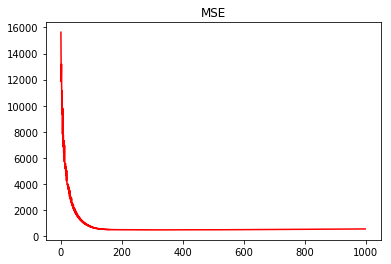

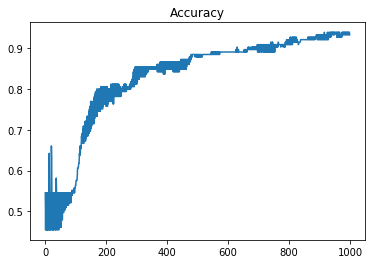

('Test Accuracy: ', 0.8333333)
MSE: 564.9057


In [111]:
# Read the dataset
X, Y = read_dataset()

# Shuffle the dataset to mix up the rows
X, Y = shuffle(X, Y, random_state = 1)

# Convert the dataset into train and test part
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=415)

# Inspect the shape of the training and testing
# print(train_x.shape)
# print(train_y.shape)
# print(test_x.shape)
# print(test_y.shape)

# Define the important parametrs and variables to work with the tensors
learning_rate = 0.01
training_epochs = 1000
cost_history = np.empty(shape = [1], dtype=float)
n_dim = X.shape[1]
print("n_dim",n_dim)

n_class = 2
model_path = "./model"

# Define the number of hidden layers and number of neurons for each layer
n_hidden_1 = 60
n_hidden_2 = 60
n_hidden_3 = 60
n_hidden_4 = 60

x = tf.placeholder(tf.float32,[None,n_dim]) # None means any value
W = tf.Variable(tf.zeros([n_dim,n_class]))
b = tf.Variable(tf.zeros([n_class]))
y_true = tf.placeholder(tf.float32,[None,n_class])

weights = {
    'h1': tf.Variable(tf.truncated_normal([n_dim,n_hidden_1])),
    'h2': tf.Variable(tf.truncated_normal([n_hidden_1,n_hidden_2])),
    'h3': tf.Variable(tf.truncated_normal([n_hidden_2,n_hidden_3])),
    'h4': tf.Variable(tf.truncated_normal([n_hidden_3,n_hidden_4])),
    'out': tf.Variable(tf.truncated_normal([n_hidden_4,n_class]))
}

biases = {
    'b1': tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2': tf.Variable(tf.truncated_normal([n_hidden_2])),
    'b3': tf.Variable(tf.truncated_normal([n_hidden_3])),
    'b4': tf.Variable(tf.truncated_normal([n_hidden_4])),
    'out': tf.Variable(tf.truncated_normal([n_class]))
}

# Initialize all the variables
init = tf.global_variables_initializer()

#  Saver object to save our model
saver = tf.train.Saver()

# Call your model defined
y = multilayer_perceptron(x, weights, biases)

# Define the cost function and optimizer
cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y, labels=y_true))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

sess = tf.Session()
sess.run(init)

# Calculate the cost and accuracy for each epoch

mse_history = []
accuracy_history = []
print("**")
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)


for epoch in range(training_epochs):
    sess.run(training_step, feed_dict={x:train_x, y_true:train_y})
    cost = sess.run(cost_function, feed_dict={x:train_x, y_true:train_y})
    cost_history = np.append(cost_history, cost)
    correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(y_true,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
    
    pred_y = sess.run(y,feed_dict={x:test_x})
    mse = tf.reduce_mean(tf.square(pred_y - test_y))
    mse_ = sess.run(mse)
    mse_history.append(mse_)
    accuracy = sess.run(accuracy,feed_dict={x: train_x, y_true:train_y})
    accuracy_history.append(accuracy)
    
    print('epoch: ',epoch,' - ','cost:',cost,' -MSE:',mse_," -Train Accuracy: ",accuracy)
save_path = saver.save(sess, model_path)

# Plot MSE and accuracy graph
plt.title("MSE")
plt.plot(mse_history,'r')
plt.show()
plt.title("Accuracy")
plt.plot(accuracy_history)
plt.show()
    
# Print the final accuracy
correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(y_true,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
print("Test Accuracy: ",(sess.run(accuracy, feed_dict={x:test_x, y_true:test_y})))

# Print final MSE
pred_y = sess.run(y, feed_dict={x:test_x})
mse = tf.reduce_mean(tf.square(pred_y-test_y))
print("MSE: %.4f"%sess.run(mse))

In [124]:
a=tf.placeholder(tf.float32)
b=tf.placeholder(tf.float32)
c=tf.equal(tf.argmax(a,0),tf.argmax(b,0))
d=tf.argmax(a,0)
e=tf.reduce_mean(tf.square(a-b))

sess = tf.Session()
print(sess.run(e,feed_dict={a:np.array([1,1,1,1,1,0,0,0,0]),b:np.array([0,1,0,0,0,0,0,0,1])}))
print(sess.run(d,feed_dict={a:np.array([1,1,1,1,1,10,10])}))
sess.run(c,feed_dict={a:np.array([1,1,1,1,1,0,0,0,0]),b:np.array([0,1,0,0,0,0,0,0,1])})

0.5555556
5


False